In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
#Standard Model value
sm = 116591810e-11
sigma_sm = 43e-11

#FNAL value
fnal = 116592055e-11
sigma_fnal = 24e-11

#BNL value
bnl =  116592080e-11
sigma_bnl = 63e-11

#Experiment average
exp =  116592059e-11
sigma_exp = 22e-11

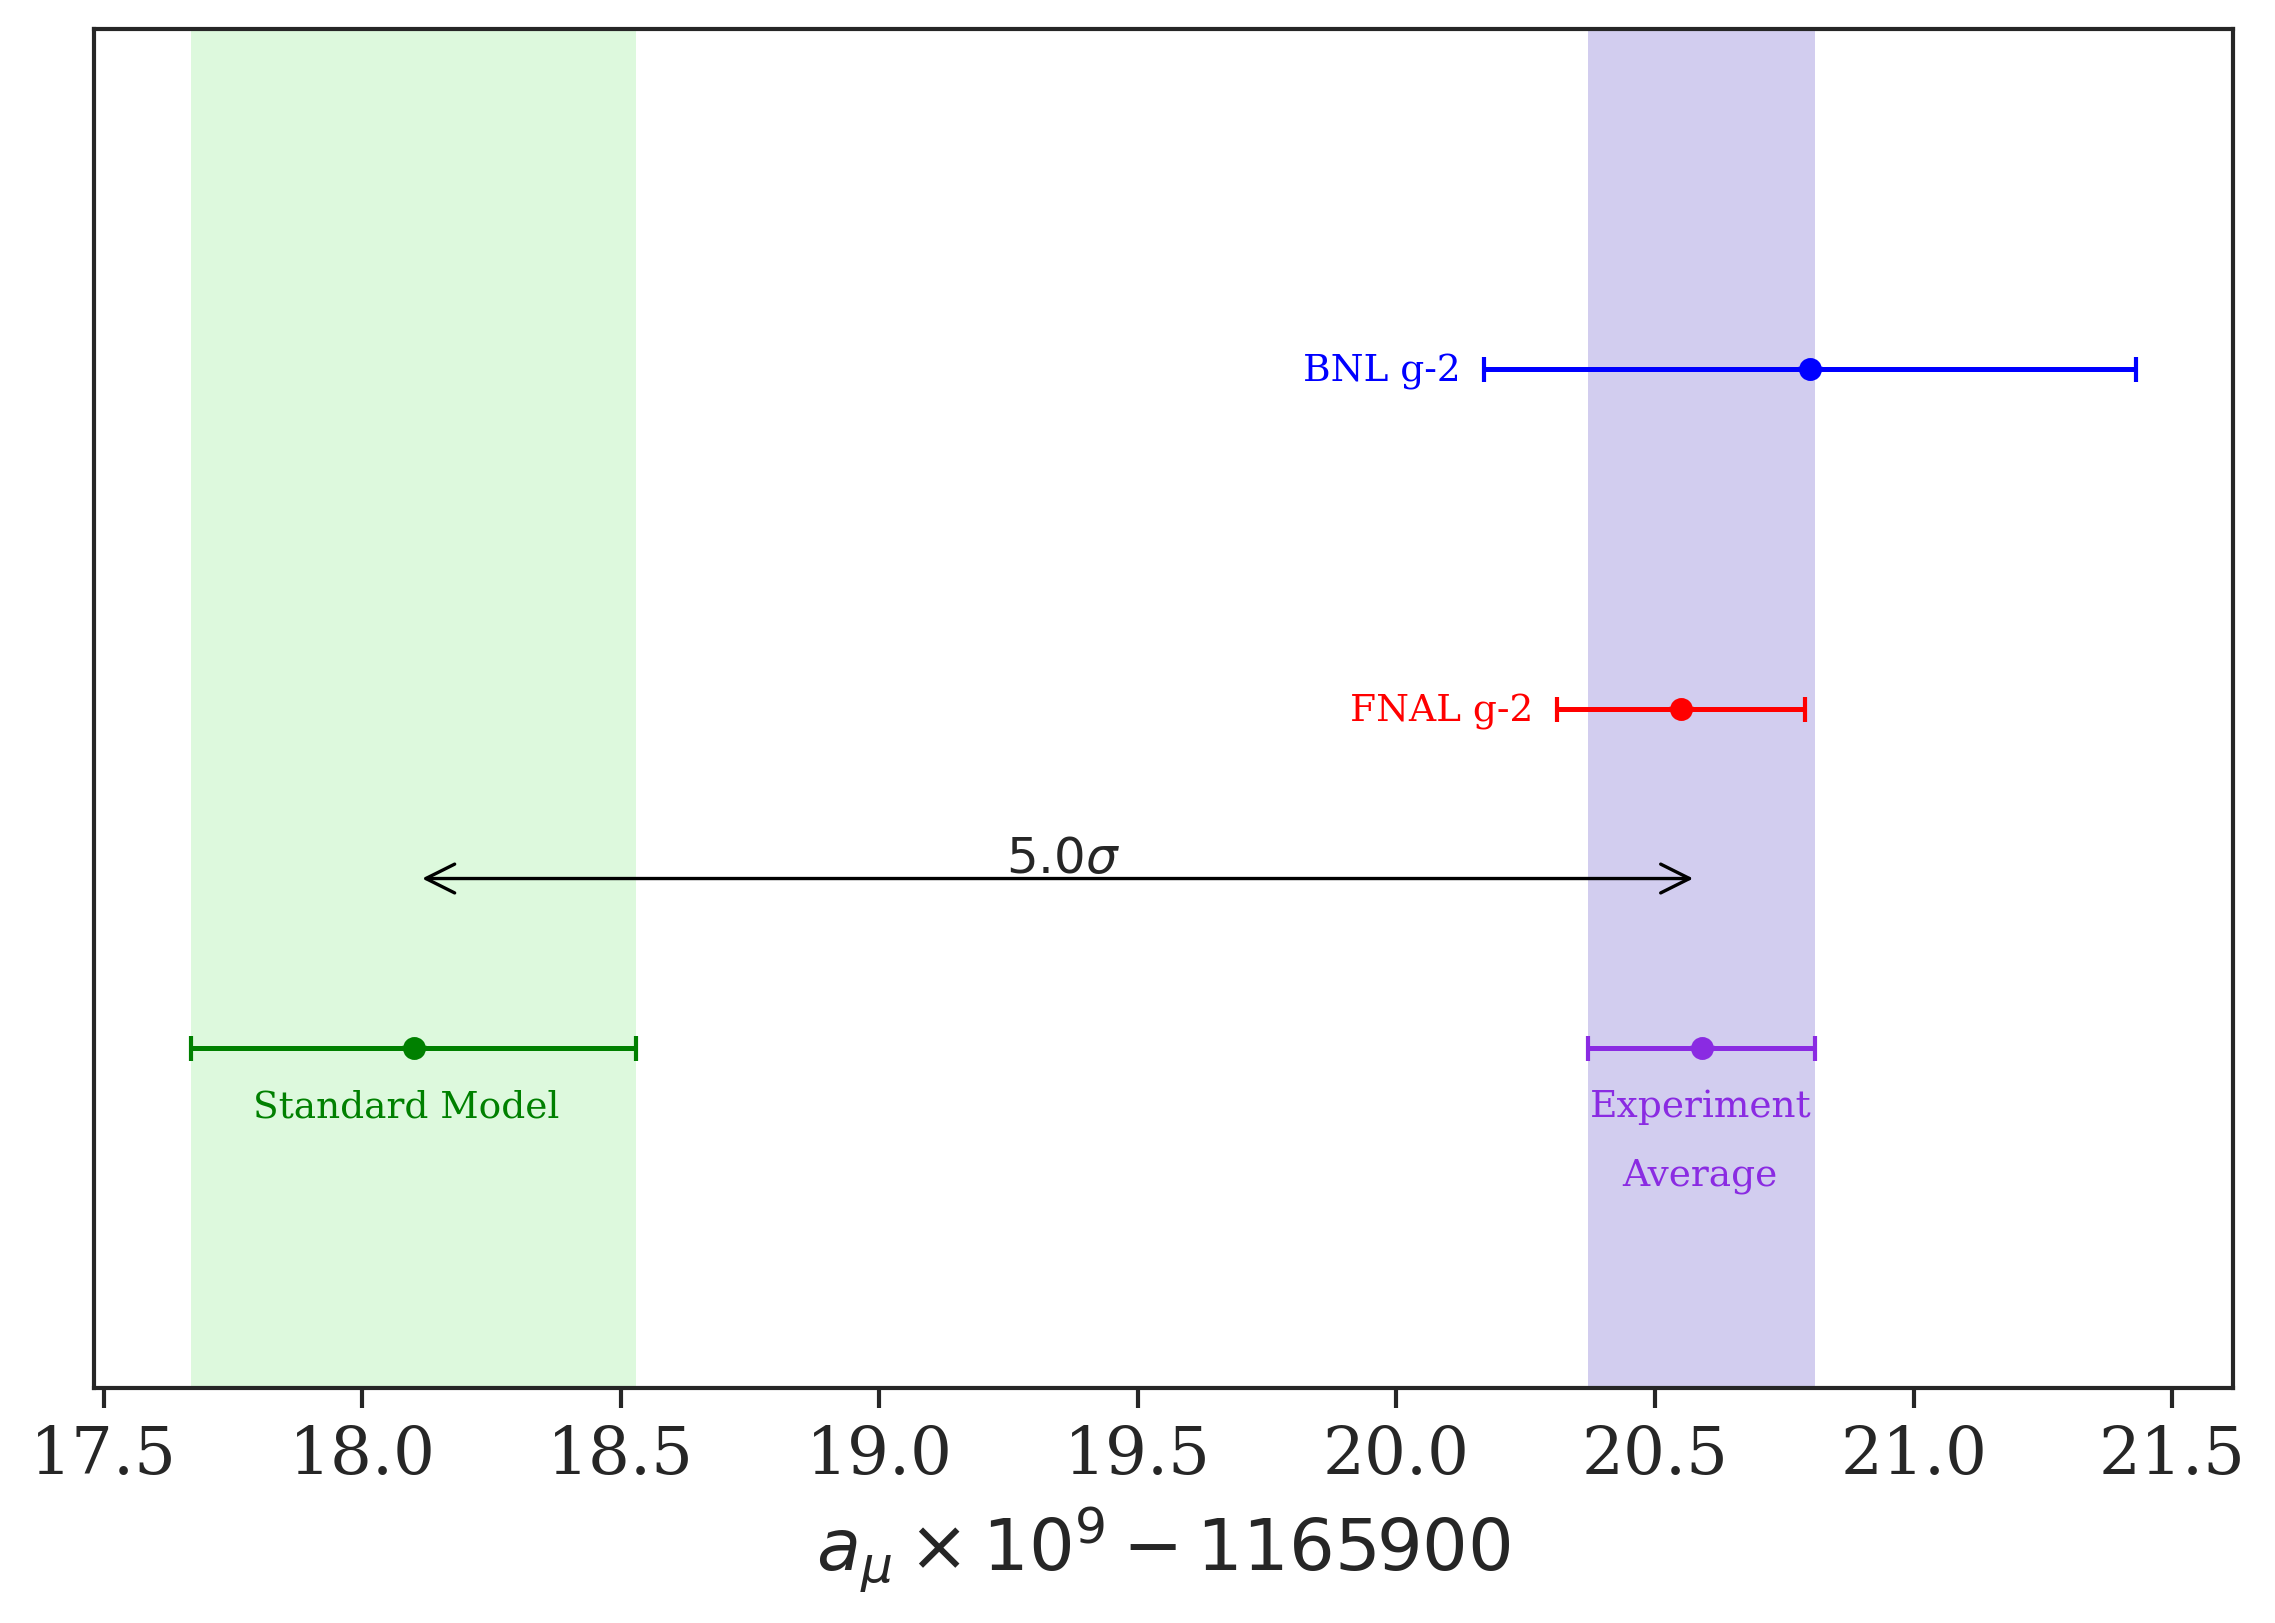

In [3]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 

#Standard Model
plt.errorbar(sm*1e9-1165900, 1,0, sigma_sm*1e9, 'o', ms = 4.5, capsize=3, color = "green", label = "Standard Model")
plt.annotate("Standard Model", xy = (sm*1e9-1165900- sigma_sm*1e9+0.12,0.9), size = 9, color = "Green")
plt.axvspan(sm*1e9-1165900 - sigma_sm*1e9 , sm*1e9-1165900  +sigma_sm*1e9 , color='lightgreen', alpha=0.3, lw=0)

#Experimental Average
plt.errorbar(exp*1e9-1165900, 1,0, sigma_exp*1e9, 'o', ms = 4.5, capsize=3, color = "blueviolet",
             label = "Experimental average")
plt.axvspan(exp*1e9-1165900 - sigma_exp*1e9 , exp*1e9-1165900  +sigma_exp*1e9 , color='slateblue', alpha=0.3
            , lw=0)
plt.annotate("Experiment", xy = (exp*1e9-1165900- sigma_exp*1e9+0.005,0.9), size = 9, color = "blueviolet")
plt.annotate("Average", xy = (exp*1e9-1165900- sigma_exp*1e9+0.067,0.8), size = 9, color = "blueviolet")


#FNAL
plt.errorbar(fnal*1e9-1165900, 1.5,0, sigma_fnal*1e9, 'o', ms = 4.5, capsize=3, color = "red", label = "FNAL")
plt.annotate("FNAL g-2", xy = (fnal*1e9-1165900- sigma_fnal*1e9-0.4,1.483), size = 9, color = "red")

#BNL
plt.errorbar(bnl*1e9-1165900, 2,0, sigma_bnl*1e9, 'o', ms = 4.5, capsize=3, color = "blue", label = "BNL")
plt.annotate("BNL g-2", xy = (bnl*1e9-1165900- sigma_bnl*1e9-0.35,1.983), size = 9, color = "blue")


#Arrow
plt.annotate('', xy=(sm*1e9-1165900, 1.25), xytext=(exp*1e9-1165900, 1.25), arrowprops={'arrowstyle': '<->', "color": "black"})
plt.annotate(r'$5.0\sigma$', xy=((sm*1e9-1165900 + exp*1e9-1165900)/2-0.1, 1.26), size = 12)

plt.ylim([0.5,2.5])
plt.yticks([])
plt.xlabel(r"$a_\mu \times 10^{9} - 1165900$")
#plt.legend()
plt.savefig("A_mu_Graph.pdf", dpi = 500)
plt.show()

In [162]:
def delta_a_mu(m_s, m_f):
    m_s = np.array(m_s)
    m_f = np.array(m_f)
    
    m_s, m_f = np.meshgrid(m_s, m_f)
    k = (m_f/m_s)**2
    l_R = 2.5
    m_mu = 105.66e-3 #GeV
    
    delta = (1/96) * (l_R*m_mu/(np.pi*m_s))**2 * (2 + 3*k - 6 * k**2 + k**3 + 6*k * np.log(k))/((1-k)**4)
    
    j=0
    ms = 100
    for l, m in enumerate(delta):
        delta[l][j] = 0.5*(1/96) * (l_R*m_mu/(np.pi*ms))**2
        j += 1
        ms += 0.1
    return delta

In [187]:
m_S = np.arange(100,300.05,0.1)
m_F = np.arange(100,300.05,0.1)

[100.  100.1 100.2 ... 299.8 299.9 300. ]


In [196]:
for i, j in enumerate(m_S):
    if np.round(j,1) == 200.0:
        print(i)
print()

1000
199.99999999999432


In [185]:
data = delta_a_mu(m_S, m_F)
print(data)
print(data.shape)
df = pd.DataFrame(data, index=m_S, columns=m_F)
print(df)

[[3.68213965e-09 3.67945771e-09 3.67625081e-09 ... 1.04408392e-09
  1.04357232e-09 1.04306109e-09]
 [3.67736951e-09 3.67478640e-09 3.67206300e-09 ... 1.04353023e-09
  1.04301908e-09 1.04250829e-09]
 [3.67330763e-09 3.67025322e-09 3.66745516e-09 ... 1.04297687e-09
  1.04246616e-09 1.04195581e-09]
 ...
 [7.03181194e-10 7.03010476e-10 7.02839736e-10 ... 4.09672676e-10
  4.06590815e-10 4.09410702e-10]
 [7.02769210e-10 7.02598670e-10 7.02428109e-10 ... 4.10694149e-10
  4.09399516e-10 4.07386843e-10]
 [7.02357580e-10 7.02187217e-10 7.02016833e-10 ... 4.09386521e-10
  4.09909753e-10 4.09126628e-10]]
(2001, 2001)
              100.0         100.1         100.2         100.3         100.4  \
100.0  3.682140e-09  3.679458e-09  3.676251e-09  3.673318e-09  3.670381e-09   
100.1  3.677370e-09  3.674786e-09  3.672063e-09  3.668920e-09  3.665990e-09   
100.2  3.673308e-09  3.670253e-09  3.667455e-09  3.664408e-09  3.661615e-09   
100.3  3.668912e-09  3.666001e-09  3.663283e-09  3.660146e-09  3.656858

C:\Users\Vinicius\AppData\Local\Temp\ipykernel_23512\1013616889.py:10: RuntimeWarning: invalid value encountered in true_divide
  delta = (1/96) * (l_R*m_mu/(np.pi*m_s))**2 * (2 + 3*k - 6 * k**2 + k**3 + 6*k * np.log(k))/((1-k)**4)


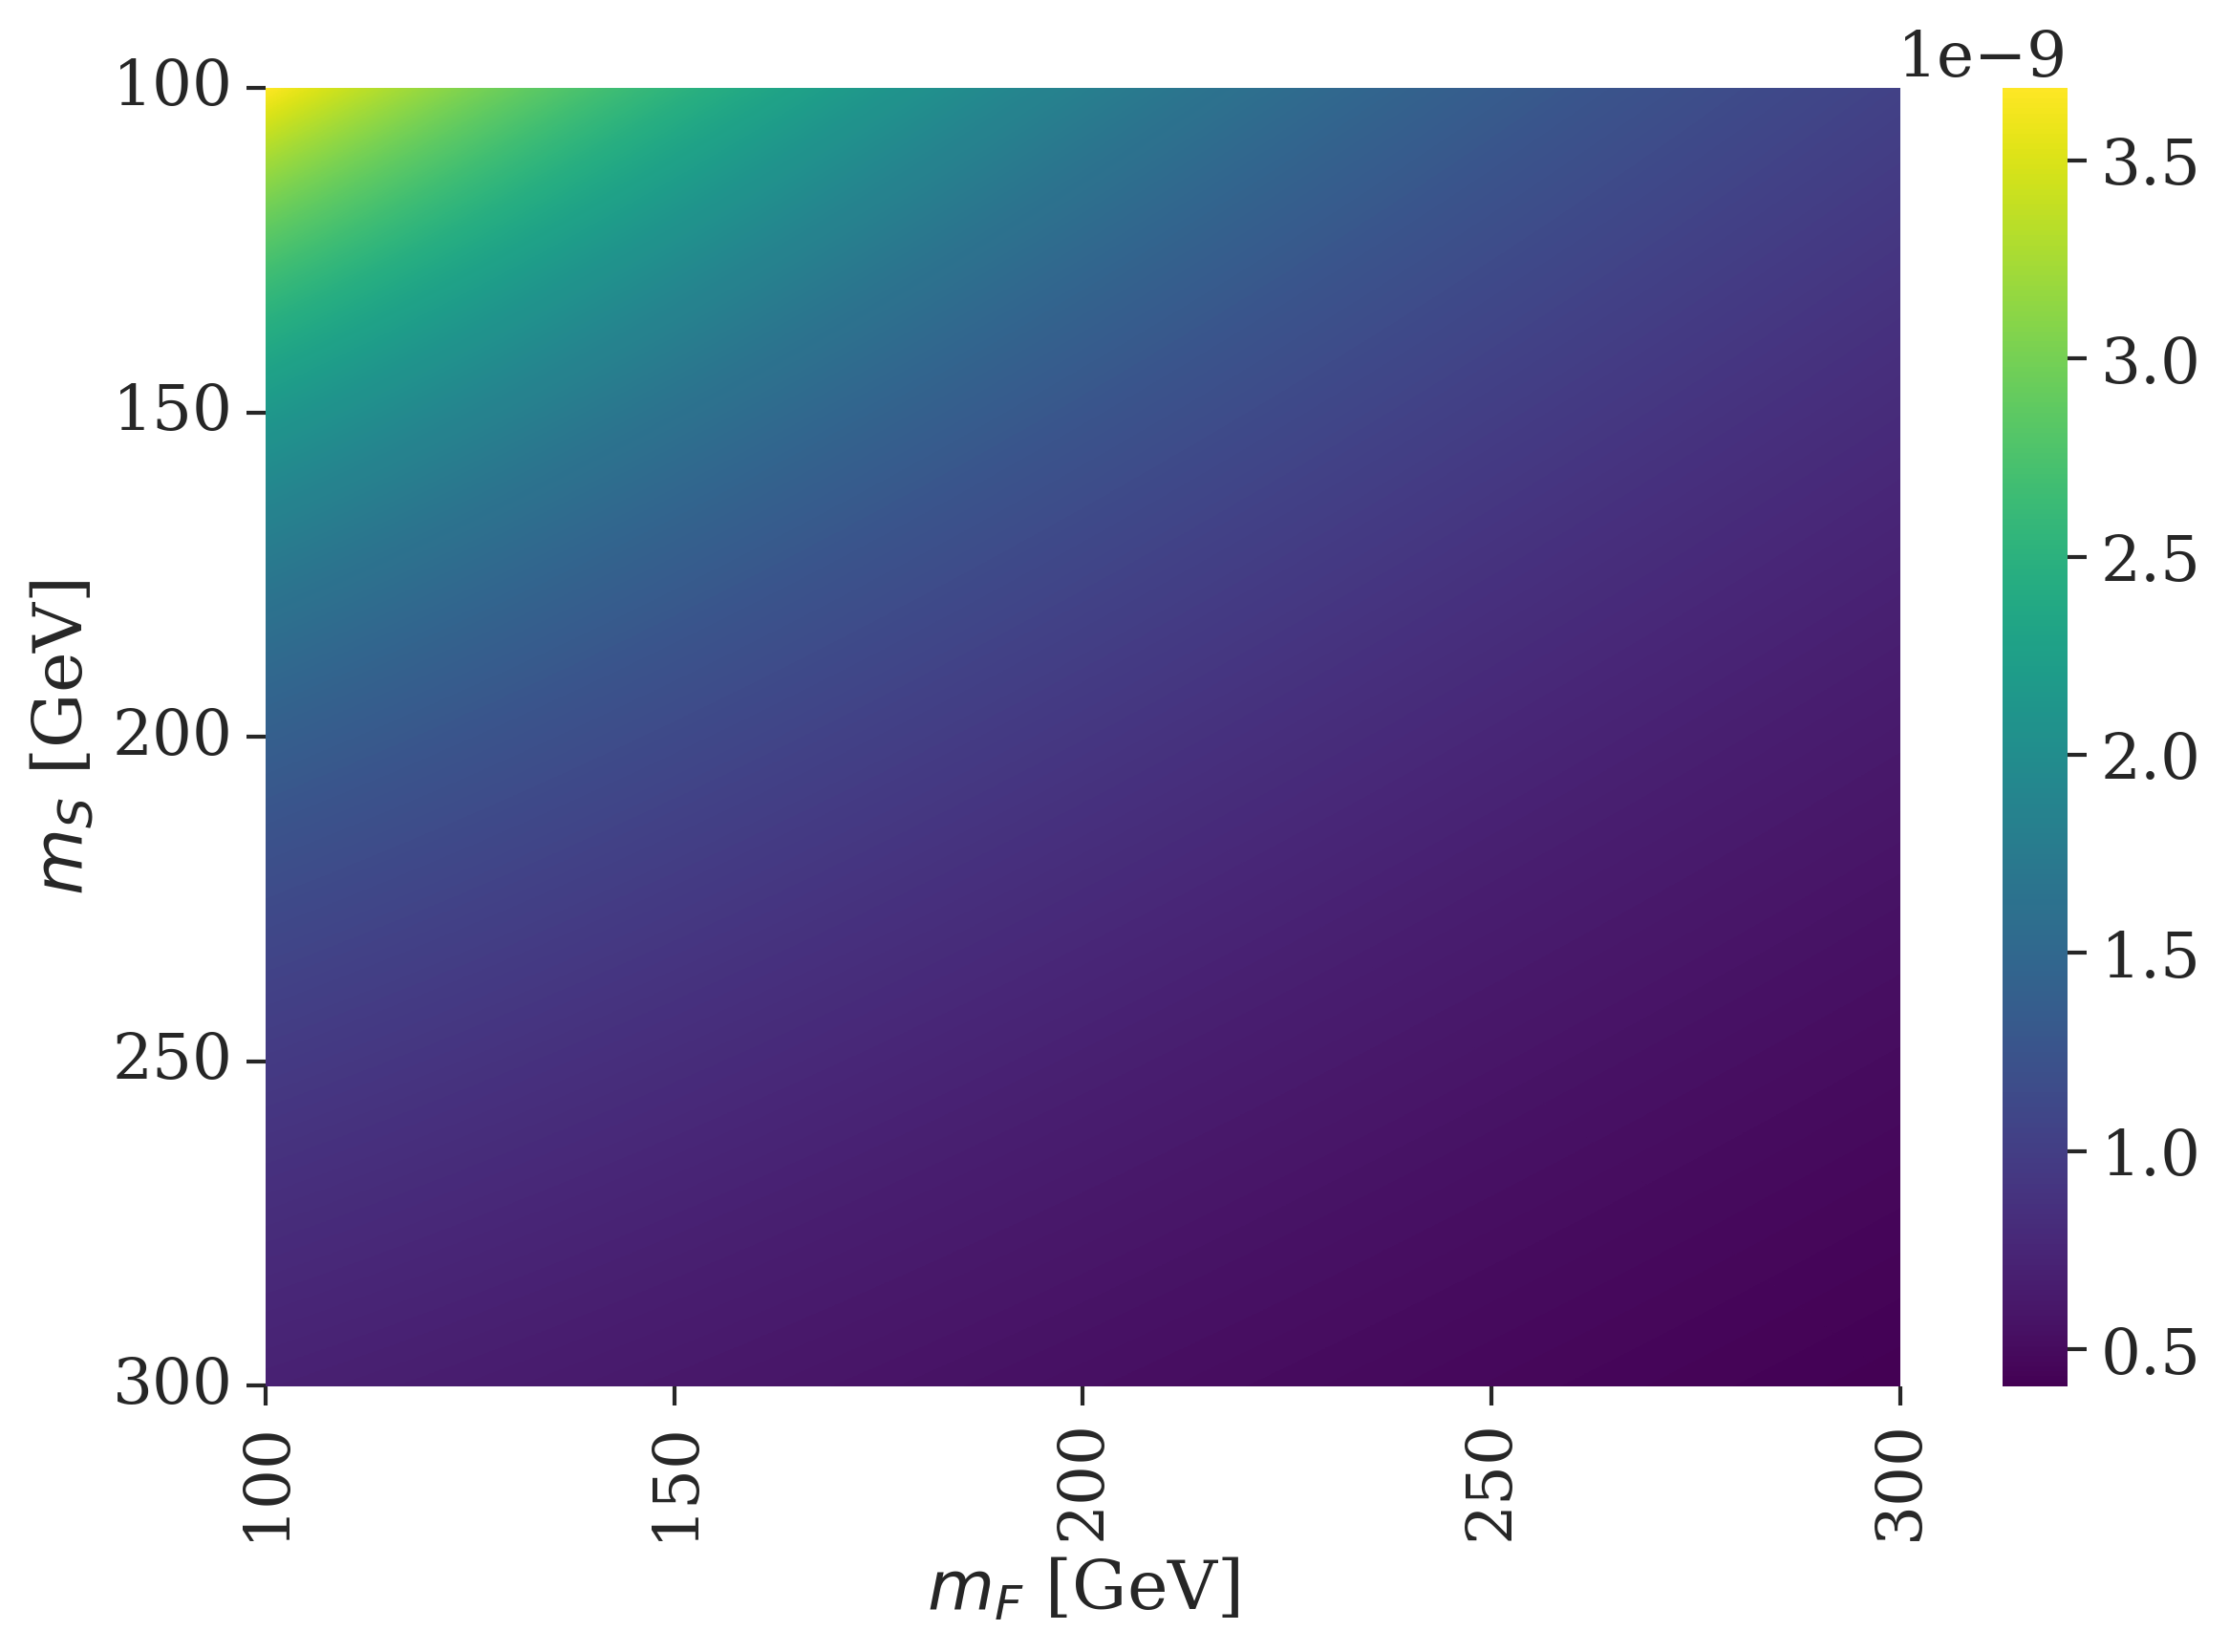

In [211]:
fig = plt.figure(figsize = [9.2,6], dpi = 300)
ax = sns.heatmap(df, cmap = "viridis")
#ax.set_xlim([100,301])
#ax.set_ylim([100,301])
ax.set_xticks([0,500,1000,1500,2000])
ax.set_xticklabels([100,150,200,250,300])
ax.set_yticks([0,500,1000,1500,2000])
ax.set_yticklabels([100,150,200,250,300])
ax.set_xlabel("$m_F$ [GeV]")
ax.set_ylabel("$m_S$ [GeV]")
plt.show()

Task         CoLA  MNLI  MRPC  QNLI   QQP   RTE  SST-2  STS-B
Model                                                        
BERT         60.5  86.7  89.3  92.7  72.1  70.1   94.9   87.6
BiLSTM       11.6  65.6  81.8  74.6  62.5  57.4   82.8   70.3
BiLSTM+Attn  18.6  67.6  83.9  74.3  60.1  58.4   83.0   72.8
BiLSTM+CoVe  18.5  65.4  78.7  70.8  60.6  52.7   81.9   64.4
BiLSTM+ELMo  32.1  67.2  84.7  75.5  61.1  57.4   89.3   70.3
ERNIE        75.5  92.3  93.9  97.3  75.2  92.6   97.8   93.0
RoBERTa      67.8  90.8  92.3  95.4  74.3  88.2   96.7   92.2
T5           71.6  92.2  92.8  96.9  75.1  92.8   97.5   93.1


<AxesSubplot:xlabel='Task', ylabel='Model'>

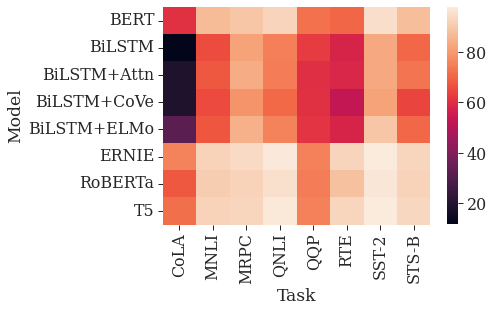

In [172]:
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
print(glue)
sns.heatmap(glue)
